In [1]:
INPUT_PATH = 'survey.csv'

In [2]:
# Import needed libraries, and set the default plot styles
import seaborn as sns
import pandas as pd
import numpy as np
from random import random
from matplotlib import pylab
%matplotlib inline
sns.set(style='whitegrid', palette='muted', rc={'figure.figsize': (12, 4)})

In [3]:
# Import and format the survey data
df = pd.DataFrame.from_csv(INPUT_PATH, index_col=None)
df.rename(columns={'Important (3,2,1)': 'Ideal'}, inplace=True)
companies = df.columns[4:]
for col in companies:
    df[col] = df[["Ideal", col]].product(axis=1)          # apply weight to indiviual company scores
df.Ideal = df.Ideal * 3                                   # set the maximum score, the ideal opportunity
df = df[['Topic', 'Category', 'Ideal'] + list(companies)]
df

,Topic,Category,Ideal,Company1,Company2,Company3
0,Money,Head,3,3,2,3
1,Benefits,Body,3,2,3,1
2,New Teammates,Heart,6,6,6,2
3,Previous Coworkers,Heart,3,1,3,1
4,Manager + Mentors,Heart,6,6,6,2
5,Evidence of Tolerance/Diversity,Soul,9,9,6,3
6,Software Development Process,Head,9,9,9,3
7,Tech Stack,Head,3,3,2,2
8,Mission,Heart,3,3,2,1
9,Ethics,Soul,6,6,6,2


In [4]:
# reshape for a single company column, to ease plotting the data
df = pd.melt(df, id_vars=['Topic', 'Category'], var_name='Company', value_name='Score')
df

,Topic,Category,Company,Score
0,Money,Head,Ideal,3
1,Benefits,Body,Ideal,3
2,New Teammates,Heart,Ideal,6
3,Previous Coworkers,Heart,Ideal,3
4,Manager + Mentors,Heart,Ideal,6
5,Evidence of Tolerance/Diversity,Soul,Ideal,9
6,Software Development Process,Head,Ideal,9
7,Tech Stack,Head,Ideal,3
8,Mission,Heart,Ideal,3
9,Ethics,Soul,Ideal,6


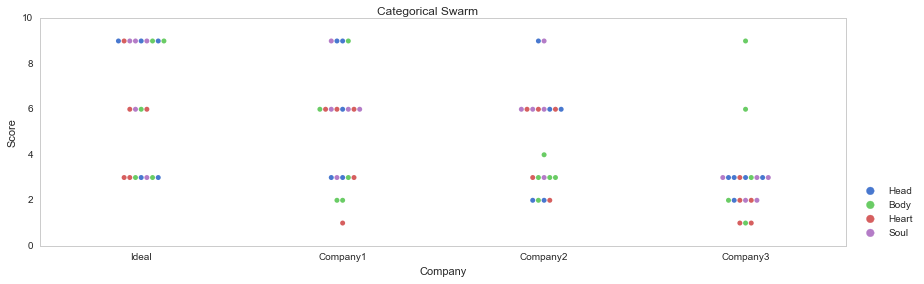

In [5]:
ax = sns.swarmplot(x='Company', y='Score', data=df, hue='Category')
ax.grid(False)
pylab.gcf().suptitle('Categorical Swarm')
pylab.gcf().tight_layout()
_ = pylab.legend(loc=9, bbox_to_anchor=(1.05, 0.30))

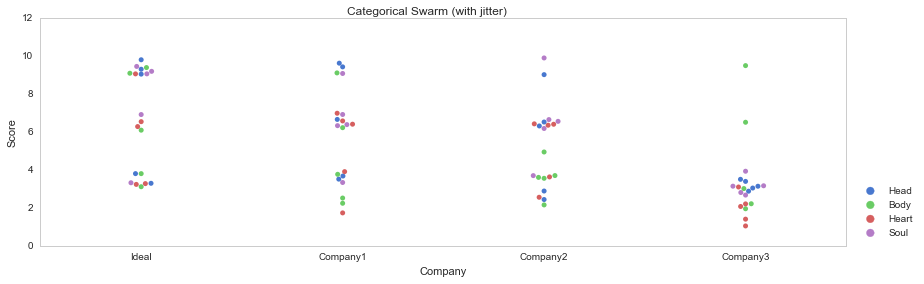

In [6]:
# add some noise to the data so that the plot does more swarming
jitter = df.copy()
jitter.Score = jitter.Score.map(lambda x: x + random())
ax = sns.swarmplot(x='Company', y='Score', data=jitter, hue='Category')
ax.grid(False)
pylab.gcf().suptitle('Categorical Swarm (with jitter)')
pylab.gcf().tight_layout()
_ = pylab.legend(loc=9, bbox_to_anchor=(1.05, 0.30))

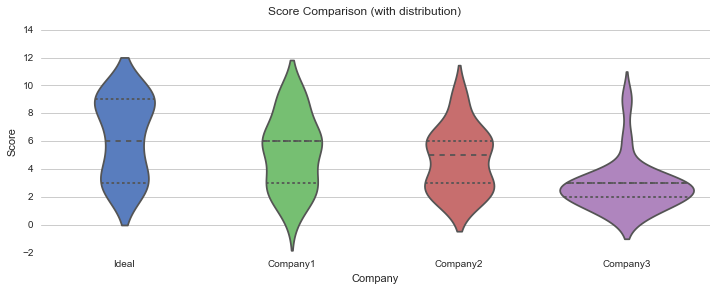

In [7]:
ax = sns.violinplot(x='Company', y='Score', data=df, inner='quart')
pylab.gcf().suptitle('Score Comparison (with distribution)')
sns.despine(left=True, bottom=True)

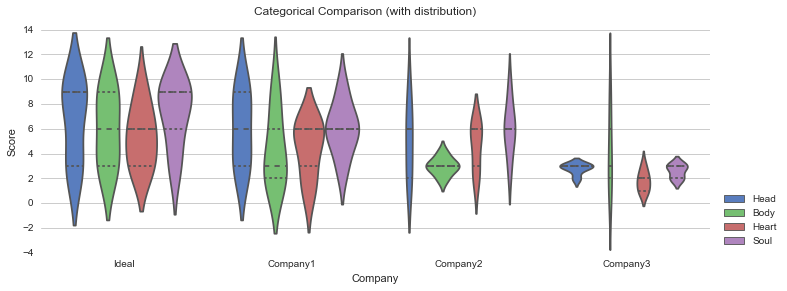

In [8]:
# sns.boxplot(x='Company', y='Score', hue='Category', data=df)
sns.violinplot(x='Company', y='Score', hue='Category', data=df, inner='quart')
pylab.gcf().suptitle('Categorical Comparison (with distribution)')
pylab.legend(loc=9, bbox_to_anchor=(1.06, 0.30))
sns.despine(left=True, bottom=True)

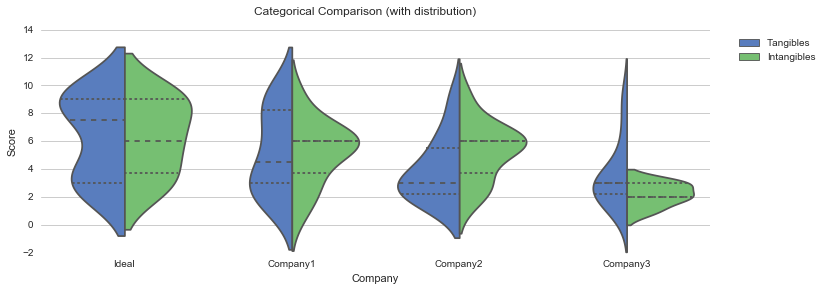

In [9]:
# sns.boxplot(x='Company', y='Score', hue='Category', data=df)
recategorized = df.copy()
recategorized.Category.replace({'Head': 'Tangibles', 'Body': 'Tangibles',
                                'Heart': 'Intangibles', 'Soul': 'Intangibles'}, inplace=True)
sns.violinplot(x='Company', y='Score', hue='Category', data=recategorized, split=True, inner='quart')
pylab.gcf().suptitle('Categorical Comparison (with distribution)')
pylab.legend(loc=9, bbox_to_anchor=(1.1, 1))
sns.despine(left=True, bottom=True)

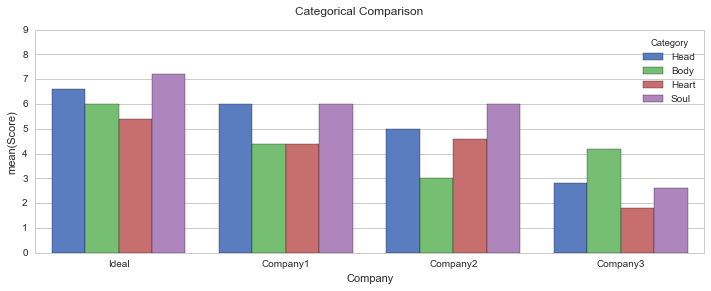

In [10]:
sns.barplot(x='Company', y='Score', hue='Category', data=df, errwidth=0)
_ = pylab.gcf().suptitle('Categorical Comparison')

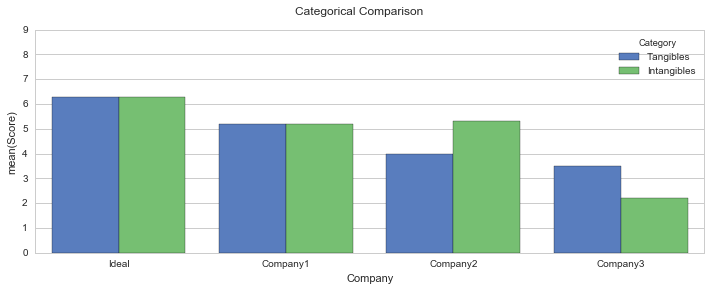

In [11]:
sns.barplot(x='Company', y='Score', hue='Category', data=recategorized, errwidth=0)
_ = pylab.gcf().suptitle('Categorical Comparison')

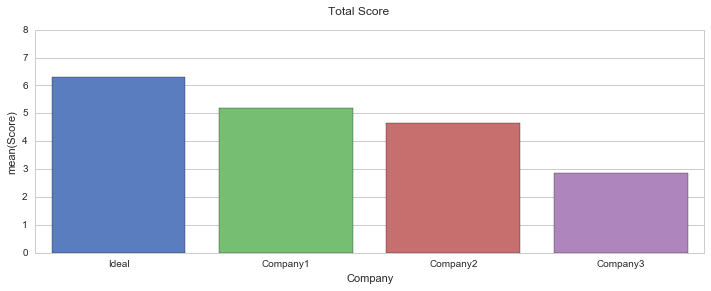

In [12]:
sns.barplot(x='Company', y='Score', data=df, errwidth=0)
_ = pylab.gcf().suptitle('Total Score')

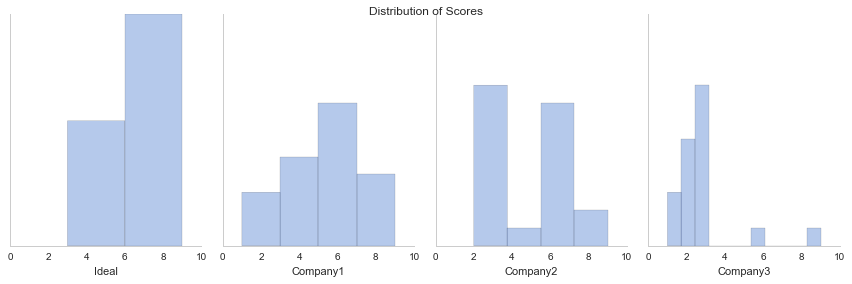

In [13]:
companies = df.Company.unique()
_, axes = pylab.subplots(1, len(companies), sharex=True, sharey=True)
for idx, company in enumerate(companies):
    ax = sns.distplot(df[df['Company'] == company].Score, ax=axes[idx], kde=False)
    ax.set_xlabel(company)
    ax.grid(False)
pylab.setp(axes, yticks=[])
pylab.locator_params(nbins=6)
pylab.gcf().suptitle('Distribution of Scores')
pylab.gcf().tight_layout()
sns.despine()

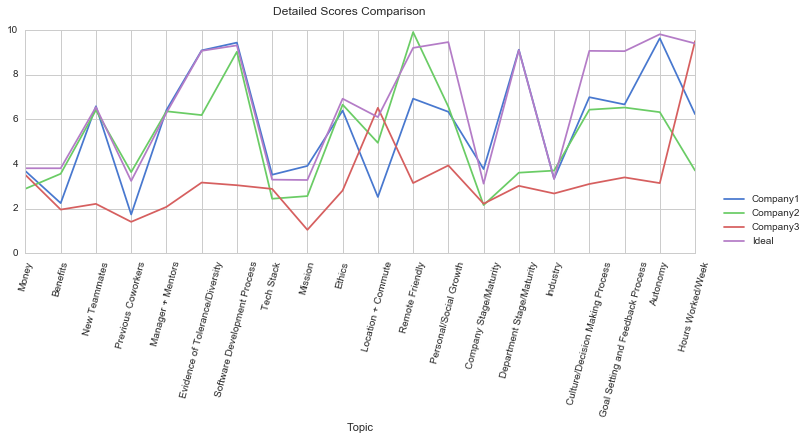

In [14]:
_, ax = pylab.subplots(1, 1)
ax.set_ylim(0, df.Score.max() + 1)
jitter.groupby('Company').plot(x='Topic', y="Score", kind='line', ax=ax)
# df.groupby('Company').plot(x='Topic', y="Score", kind='line', ax=ax)
#pylab.xticks(rotation=75)
pylab.gcf().suptitle('Detailed Scores Comparison')
pylab.xticks(range(len(df.Topic.unique())), df.Topic.unique(), rotation=75)
_ = pylab.legend([v[0] for v in df.groupby('Company')], loc=9, bbox_to_anchor=(1.1, 0.30))

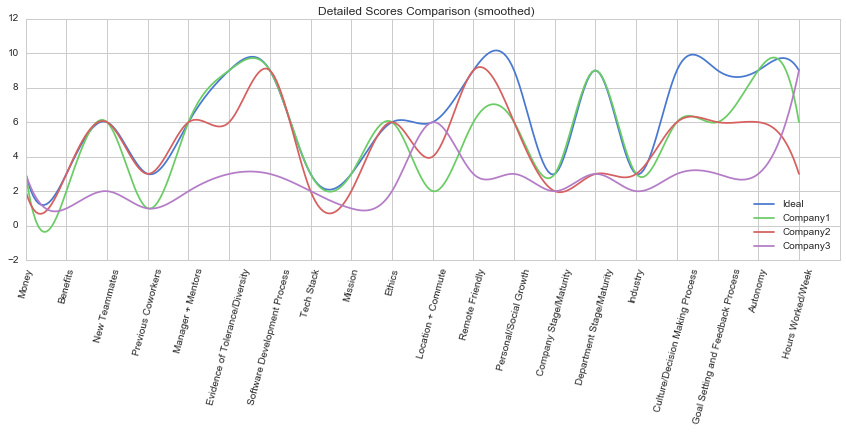

In [15]:
from scipy.interpolate import spline
x = range(0, len(df.Topic.unique()))
x_smooth = np.linspace(min(x), max(x), 300)
_, ax = pylab.subplots(1, 1)

for company in df.Company.unique():
    y = df[df.Company == company].Score
    y_smooth = spline(x, y, x_smooth)
    ax.plot(x_smooth, y_smooth, label=company)
    
ax.legend()
pylab.gcf().suptitle('Detailed Scores Comparison (smoothed)')
pylab.gcf().tight_layout()
pylab.xticks(range(len(df.Topic.unique())), df.Topic.unique(), rotation=75)
_ = pylab.legend(loc='lower right')

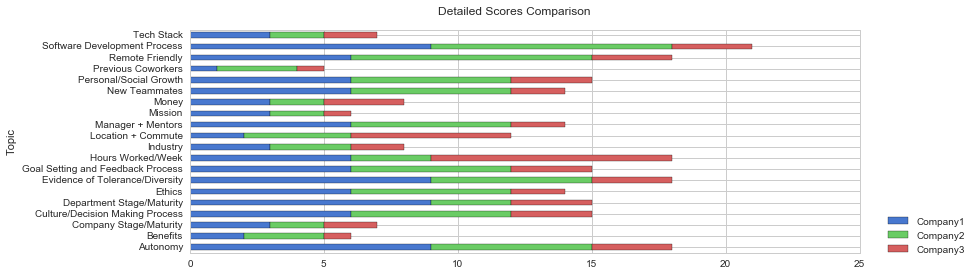

In [16]:
df[df.Company != 'Ideal'].pivot('Topic', 'Company')['Score'].plot(kind='barh', stacked=True)
pylab.gcf().suptitle('Detailed Scores Comparison')
_ = pylab.legend(loc=9, bbox_to_anchor=(1.1, 0.20))

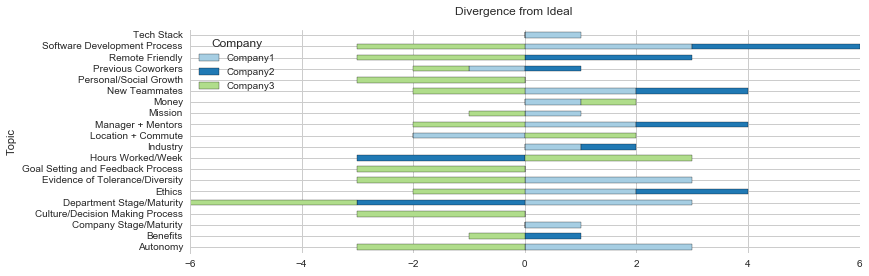

In [17]:
diverged = df.pivot('Topic', 'Company')['Score']
for idx, company in enumerate(diverged.drop('Ideal', axis=1)):
    diverged[company] -= (diverged['Ideal'] / 3.0) * 2.0
diverged.drop('Ideal', axis=1).plot(kind='barh', stacked=True, color=sns.color_palette('Paired'))
sns.despine(bottom=True)
_ = pylab.gcf().suptitle('Divergence from Ideal')

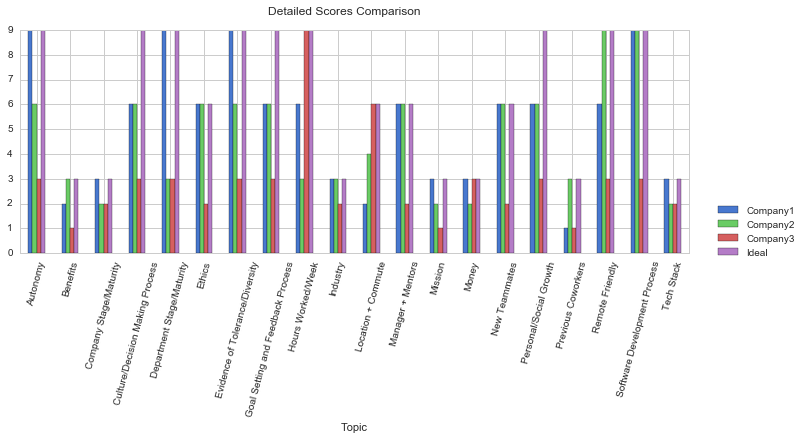

In [18]:
df.pivot('Topic', 'Company')['Score'].plot(kind='bar')
pylab.gcf().suptitle('Detailed Scores Comparison')
pylab.xticks(rotation=75)
_ = pylab.legend(loc=9, bbox_to_anchor=(1.1, 0.25))

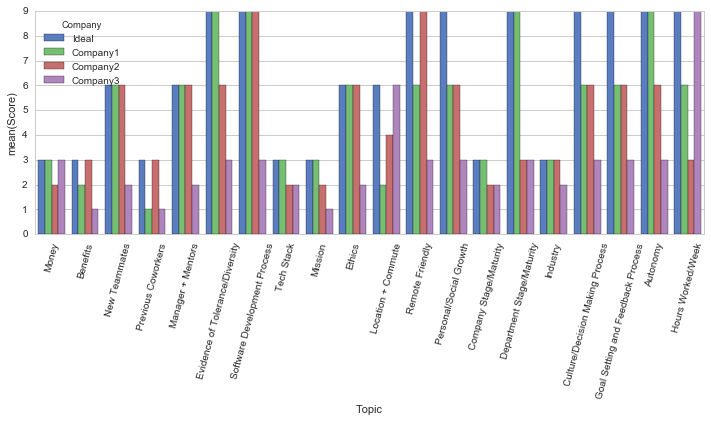

In [19]:
sns.barplot(x='Topic', y='Score', hue='Company', data=df)
_ = pylab.xticks(rotation=75)

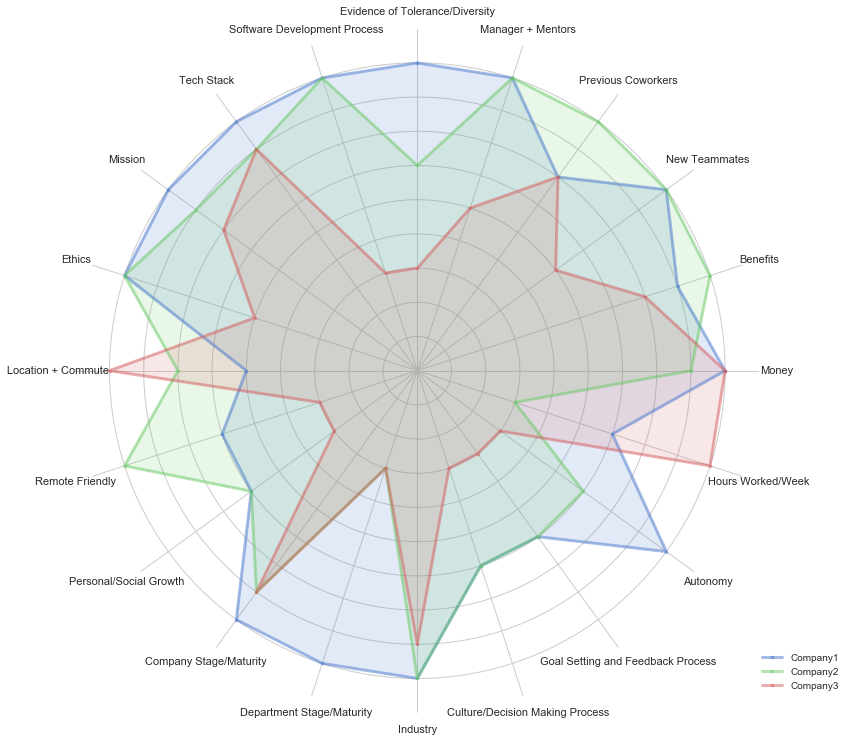

In [20]:
from radarplot import Radar

ideal_scores = df[df.Company == 'Ideal'].Score
titles = df.Topic.unique()
labels = [range(1, ideal_scores.max() + 1)] + [[]] * (len(titles) - 1)

radar = Radar(pylab.figure(figsize=(12, 10)), titles, labels)
for company in companies[1:]:
    scores = df[df.Company == company].Score
    # take weights into account, represent the ideal as the highest possible score
    scores = map(lambda x: (ideal_scores.max() - x[0] + x[1]), zip(ideal_scores, scores))
    radar.plot(scores, '.-', lw=3, alpha=0.50, label=company)
_ = radar.ax.legend(loc=9, bbox_to_anchor=(1.06, 0.10))